In [111]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---


In [112]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

pd.options.display.max_rows = 100

In [113]:
data=pd.read_csv(r'C:\Users\naveen chauhan\Desktop\mldata\titanic dataset\train.csv')

In [114]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
data.index

RangeIndex(start=0, stop=891, step=1)

In [116]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [117]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [118]:
data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [119]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [120]:
data.Ticket.value_counts()

347082               7
1601                 7
CA. 2343             7
3101295              6
CA 2144              6
347088               6
S.O.C. 14879         5
382652               5
W./C. 6608           4
17421                4
347077               4
113760               4
19950                4
113781               4
PC 17757             4
349909               4
LINE                 4
2666                 4
4133                 4
248727               3
345773               3
35273                3
371110               3
29106                3
110152               3
24160                3
PC 17572             3
230080               3
363291               3
110413               3
PC 17760             3
C.A. 31921           3
SC/Paris 2123        3
PC 17755             3
C.A. 34651           3
PC 17582             3
13502                3
239853               3
347742               3
F.C.C. 13529         3
PC 17761             2
113803               2
367226               2
230136     

In [121]:
data.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
F33                3
F2                 3
D                  3
C22 C26            3
E101               3
C93                2
C68                2
E67                2
B18                2
D26                2
C78                2
D33                2
B35                2
C123               2
F4                 2
E8                 2
C126               2
D20                2
C92                2
C125               2
B77                2
D17                2
D35                2
E25                2
B5                 2
C124               2
C83                2
B58 B60            2
E24                2
E121               2
E44                2
B20                2
B49                2
C52                2
B57 B59 B63 B66    2
C2                 2
B51 B53 B55        2
B28                2
E33                2
C65                2
F G73              2
D36                2
B22                2
E63                1
D46          

In [122]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [123]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [124]:
data['Age'].fillna(data.Age.median(),inplace=True)

In [125]:
survived_sex=data[data['Survived']==1]['Sex'].value_counts()

In [126]:
dead_sex=data[data['Survived']==0]['Sex'].value_counts()

In [127]:
df=pd.DataFrame([survived_sex,dead_sex],index=['survived','dead'])

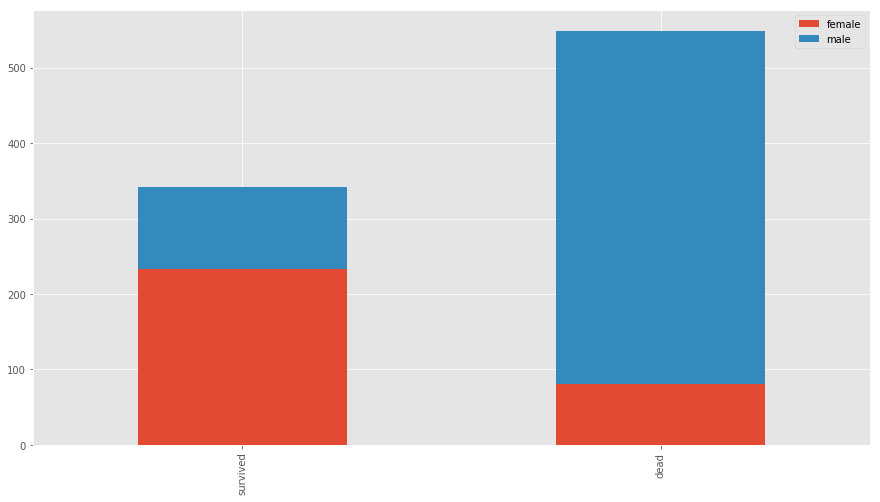

In [128]:
df.plot(kind='bar',stacked=True,figsize=(15,8))

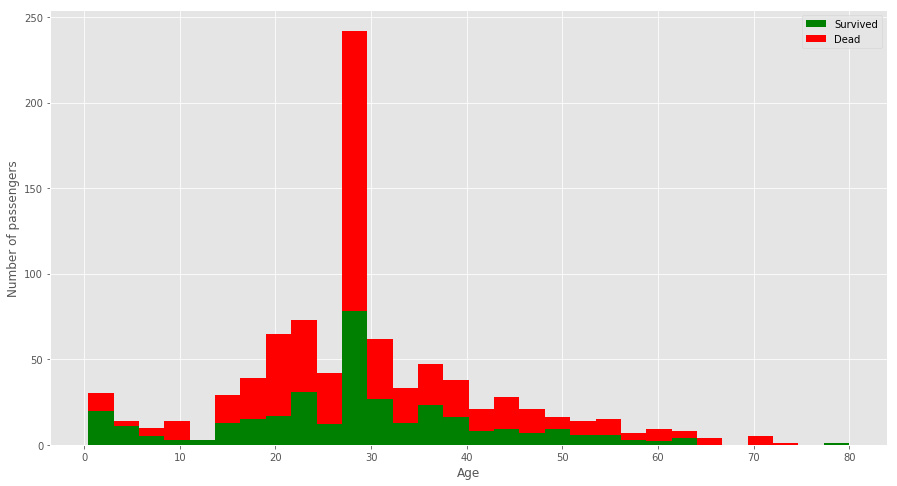

In [129]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

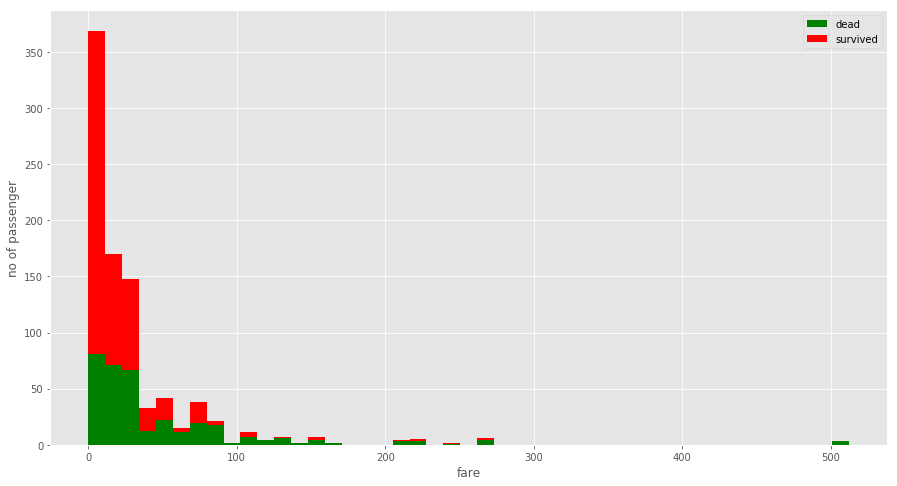

In [130]:
figure=plt.figure(figsize=(15,8))
plt.hist([data[data.Survived==1]['Fare'],data[data.Survived==0]['Fare']],stacked=True,color=['g','r'],bins=45,label={'survived','dead'})
plt.xlabel('fare')
plt.ylabel('no of passenger')
plt.legend()

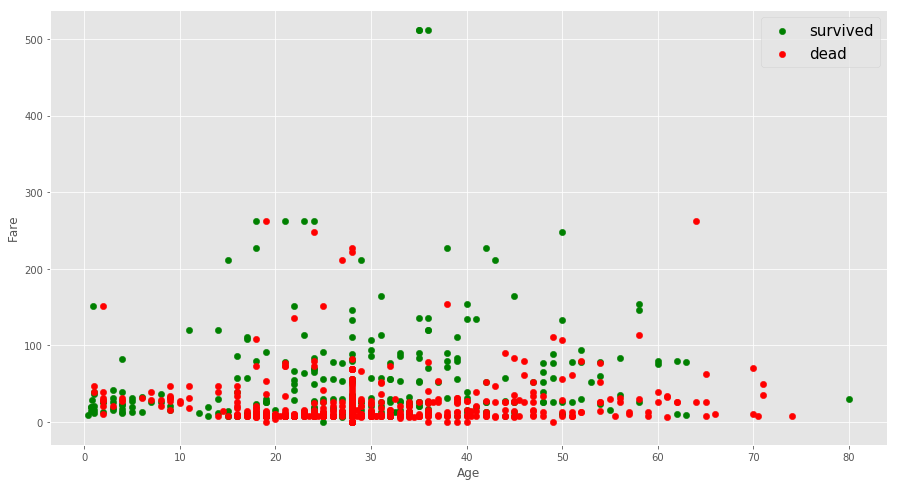

In [131]:
plt.figure(figsize=(15,8))
ax=plt.subplot()
ax.scatter(data[data.Survived==1]['Age'],data[data.Survived==1]['Fare'],c='green',s=40)
ax.scatter(data[data.Survived==0]['Age'],data[data.Survived==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15)

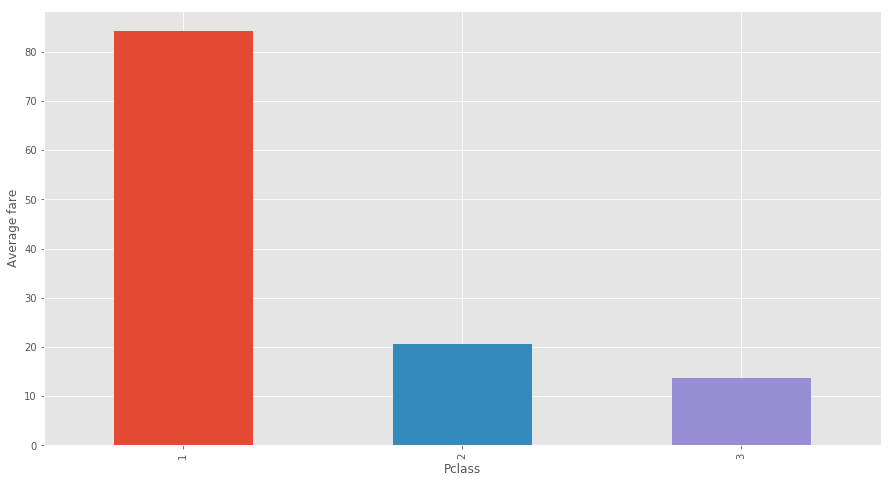

In [132]:
ax=plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').Fare.mean().plot(kind='bar',figsize=(15,8),ax=ax)

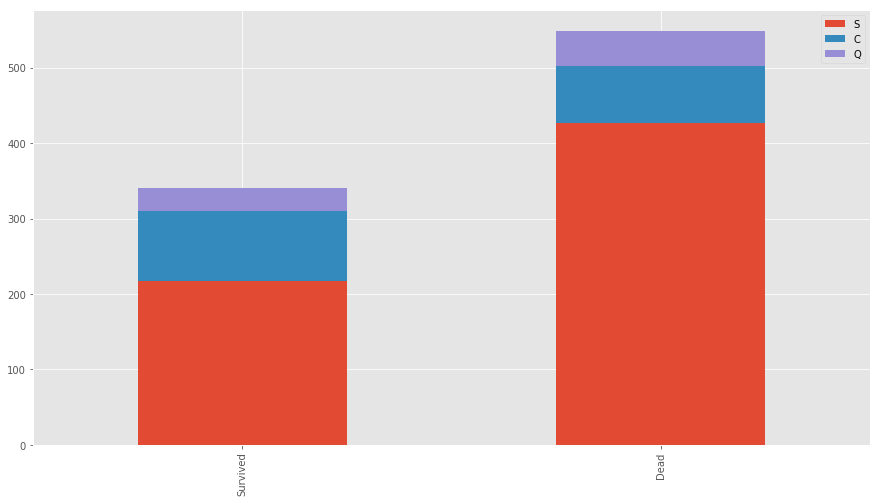

In [133]:
survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8))

In [134]:
test=pd.read_csv(r'C:\Users\naveen chauhan\Desktop\mldata\titanic dataset\test.csv')

In [135]:
train=pd.read_csv(r'C:\Users\naveen chauhan\Desktop\mldata\titanic dataset\train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
target=train.Survived

In [137]:
train.drop('Survived',axis=1,inplace=True)

In [138]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
combined=train.append(test)

In [140]:
combined.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [141]:
combined.shape

(1309, 11)

In [142]:
combined['title']=combined.Name.map(lambda x:x.split(',')[1].split('.')[0].strip())

In [143]:
combined.title.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: title, dtype: object

In [144]:
title_dictionary={
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Mme":        "Mrs",
        "Mlle":       "Miss",
        "Ms":         "Mrs",
        "Mr" :        "Mr",
        "Mrs" :       "Mrs",
        "Miss" :      "Miss",
        "Master" :    "Master",
        "Lady" :      "Royalty"
        }

In [145]:
combined['title']=combined['title'].map(title_dictionary)
combined.title.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: title, dtype: object

In [146]:
combined.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [147]:
combined.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Royalty
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master


In [148]:
grouped_train=combined.head(891).groupby(['Sex','Pclass','title'])

In [149]:
grouped_train_median=grouped_train.median()

In [150]:
grouped_train_median

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass title                                              
female 1      Miss           369.0  30.0    0.0    0.0   88.25000
              Mrs            499.0  40.0    1.0    0.0   79.20000
              Officer        797.0  49.0    0.0    0.0   25.92920
              Royalty        658.5  40.5    0.5    0.0   63.05000
       2      Miss           437.5  24.0    0.0    0.0   13.00000
              Mrs            439.5  31.5    1.0    0.0   26.00000
       3      Miss           372.0  18.0    0.0    0.0    8.75625
              Mrs            405.5  31.0    1.0    1.0   15.97500
male   1      Master         446.0   4.0    1.0    2.0  120.00000
              Mr             463.0  40.0    0.0    0.0   42.40000
              Officer        648.0  51.0    0.0    0.0   35.50000
              Royalty        600.0  40.0    0.0    0.0   27.72080
       2      Master         408.0   1.0    1.0    1.0   26.00000
              Mr             440.0  31.0    0.0    0.0   13.00000
              Officer        358.5  46.5    0.0    0.0   13.00000
       3      Master         270.5   4.0    3.5    1.0   28.51250
              Mr             472.0  26.0    0.0    0.0    7.89580

In [151]:
grouped_test=combined.iloc[891:,:].groupby(['Sex','Pclass','title'])

In [152]:
grouped_test_median=grouped_test.median()

In [153]:
grouped_test_median

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass title                                              
female 1      Miss          1074.0  32.0    0.0    0.0  158.20835
              Mrs           1076.0  48.0    1.0    0.0   63.35830
              Royalty       1306.0  39.0    0.0    0.0  108.90000
       2      Miss          1121.0  19.5    1.0    1.0   24.50000
              Mrs           1123.5  29.0    0.0    0.0   26.00000
       3      Miss          1090.5  22.0    0.0    0.0    7.87920
              Mrs           1048.0  28.0    1.0    0.5   14.28125
male   1      Master        1022.0   9.5    1.0    2.0  198.43750
              Mr            1102.0  42.0    0.0    0.0   50.24790
              Officer       1094.0  53.0    1.0    0.0   81.85830
       2      Master        1033.5   5.0    0.5    1.5   27.75000
              Mr            1156.0  28.0    0.0    0.0   13.00000
              Officer       1048.5  35.5    0.5    0.5   19.50000
       3      Master        1173.0   7.0    1.0    1.0   15.24580
              Mr            1101.0  25.0    0.0    0.0    7.85420

In [154]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [155]:
def process_age():
    global combined
    
    def fillAges(row,grouped_median):
        if row['Sex']=='female' and row['Pclass']==1 :
            if row['title']=='Miss':
                return grouped_median.loc['female',1,'Miss']['Age']
            elif row['title']=='Mrs':
                return grouped_median.loc['female',1,'Mrs']['Age']
            elif row['title']=='Royalty':
                return grouped_median.loc['female',1,'Royalty']['Age'] 
        elif row['Sex']=='female' and row['Pclass']==2 :
            if row['title']=='Miss':
                return grouped_median.loc['female',2,'Miss']['Age']
            elif row['title']=='Mrs':
                return grouped_median.loc['female',2,'Mrs']['Age']
        elif row['Sex']=='female' and row['Pclass']==3 :
            if row['title']=='Miss':
                return grouped_median.loc['female',3,'Miss']['Age']
            elif row['title']=='Mrs':
                return grouped_median.loc['female',3,'Mrs']['Age']
        elif row['Sex']=='male' and row['Pclass']==1 :
            if row['title']=='Master':
                return grouped_median.loc['male',1,'Master']['Age']
            elif row['title']=='Mr':
                return grouped_median.loc['male',1,'Mr']['Age']
            elif row['title']=='Officer':
                return grouped_median.loc['male',1,'Officer']['Age']
        elif row['Sex']=='male' and row['Pclass']==2 :
            if row['title']=='Master':
                return grouped_median.loc['male',2,'Master']['Age']
            elif row['title']=='Mr':
                return grouped_median.loc['male',2,'Mr']['Age']
            elif row['title']=='Officer':
                return grouped_median.loc['male',2,'Officer']['Age']
        elif row['Sex']=='male' and row['Pclass']==3 :
            if row['title']=='Master':
                return grouped_median.loc['male',3,'Master']['Age']
            elif row['title']=='Mr':
                return grouped_median.loc['male',3,'Mr']['Age']
    combined.head(891).Age=combined.head(891).apply(lambda r:fillAges(r,grouped_train_median) if np.isnan(r['Age'])
                                                    else r['Age'] ,axis=1)
    combined.iloc[891:,].Age=combined.iloc[891:,].apply(lambda r:fillAges(r,grouped_test_median) if np.isnan(r['Age'])
                                                    else r['Age'] ,axis=1)
            

In [156]:
process_age()

In [157]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [158]:
combined.drop('Name',axis=1,inplace=True)

In [159]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [160]:
title_dummies=pd.get_dummies(combined['title'],prefix='title')

In [161]:
title_dummies.head()

,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [162]:
combined=pd.concat([combined,title_dummies],axis=1)

In [163]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,1,0,0,0


In [164]:
combined.drop('title',axis=1,inplace=True)

In [165]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [166]:
combined['Embarked'].fillna('S',inplace=True)

In [167]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1308 non-null float64
Cabin            295 non-null object
Embarked         1309 non-null object
title_Master     1309 non-null uint8
title_Miss       1309 non-null uint8
title_Mr         1309 non-null uint8
title_Mrs        1309 non-null uint8
title_Officer    1309 non-null uint8
title_Royalty    1309 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(6)
memory usage: 120.2+ KB


In [168]:
combined.head(891).Fare.fillna(combined.head(891).Fare.mean(),inplace=True)

In [169]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1308 non-null float64
Cabin            295 non-null object
Embarked         1309 non-null object
title_Master     1309 non-null uint8
title_Miss       1309 non-null uint8
title_Mr         1309 non-null uint8
title_Mrs        1309 non-null uint8
title_Officer    1309 non-null uint8
title_Royalty    1309 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(6)
memory usage: 120.2+ KB


In [170]:
combined.iloc[891:,].Fare.fillna(combined.iloc[891:,].Fare.mean(),inplace=True)

In [171]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Cabin            295 non-null object
Embarked         1309 non-null object
title_Master     1309 non-null uint8
title_Miss       1309 non-null uint8
title_Mr         1309 non-null uint8
title_Mrs        1309 non-null uint8
title_Officer    1309 non-null uint8
title_Royalty    1309 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(6)
memory usage: 120.2+ KB


In [172]:
combined.Cabin.fillna('U',inplace=True)

In [173]:
combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Cabin            1309 non-null object
Embarked         1309 non-null object
title_Master     1309 non-null uint8
title_Miss       1309 non-null uint8
title_Mr         1309 non-null uint8
title_Mrs        1309 non-null uint8
title_Officer    1309 non-null uint8
title_Royalty    1309 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(6)
memory usage: 120.2+ KB


In [174]:
embarked_dummies=pd.get_dummies(combined.Embarked,prefix='Embarked')
embarked_dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [175]:
combined=pd.concat([combined,embarked_dummies],axis=1)

In [176]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,3,male,22.0,1,0,A/5 21171,7.2500,U,S,0,0,1,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0,1,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0,0,0,1
4,5,3,male,35.0,0,0,373450,8.0500,U,S,0,0,1,0,0,0,0,0,1


In [177]:
combined.drop('Embarked',axis=1,inplace=True)

In [178]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,3,male,22.0,1,0,A/5 21171,7.2500,U,0,0,1,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,0,1,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,5,3,male,35.0,0,0,373450,8.0500,U,0,0,1,0,0,0,0,0,1


In [179]:
combined['Cabin']=combined.Cabin.map(lambda c:c[0])
combined.Cabin.head()

0    U
1    C
2    U
3    C
4    U
Name: Cabin, dtype: object

In [180]:
cabin_dummies=pd.get_dummies(combined.Cabin,prefix='cabin')

In [181]:
cabin_dummies.head()

,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [182]:
combined=pd.concat([combined,cabin_dummies],axis=1)

In [183]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_C,Embarked_Q,Embarked_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,U,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,C,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,3,male,35.0,0,0,373450,8.0500,U,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [184]:
combined.drop('Cabin',axis=1,inplace=True)

In [185]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_C,Embarked_Q,Embarked_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [186]:
combined['Sex']=combined['Sex'].map({'male':1,'female':0})

In [187]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_C,Embarked_Q,Embarked_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U
0,1,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,1,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,3,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [188]:
pclass_dummies=pd.get_dummies(combined.Pclass,prefix='Pclass')

In [189]:
combined=pd.concat([combined,pclass_dummies],axis=1)

In [190]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_C,Embarked_Q,Embarked_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,2,1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,4,1,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4,5,3,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [191]:
combined.drop('Pclass',axis=1,inplace=True)

In [192]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_C,Embarked_Q,Embarked_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,2,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,4,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4,5,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [193]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 28 columns):
PassengerId      1309 non-null int64
Sex              1309 non-null int64
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
title_Master     1309 non-null uint8
title_Miss       1309 non-null uint8
title_Mr         1309 non-null uint8
title_Mrs        1309 non-null uint8
title_Officer    1309 non-null uint8
title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
cabin_A          1309 non-null uint8
cabin_B          1309 non-null uint8
cabin_C          1309 non-null uint8
cabin_D          1309 non-null uint8
cabin_E          1309 non-null uint8
cabin_F          1309 non-null uint8
cabin_G          1309 non-null uint8
cabin_T          1309 non-null uint8
c

In [194]:
combined.head(15)

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_C,Embarked_Q,Embarked_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,2,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,4,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
4,5,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
5,6,1,26.0,0,0,330877,8.4583,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
6,7,1,54.0,0,0,17463,51.8625,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
7,8,1,2.0,3,1,349909,21.0750,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
8,9,0,27.0,0,2,347742,11.1333,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
9,10,0,14.0,1,0,237736,30.0708,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [195]:
def process_ticket():
    
    global combined
    
    
    def cleanticket(ticket):
        ticket=ticket.replace('.','')
        ticket=ticket.replace('/','')
        ticket=ticket.split()
        ticket=map(lambda t :t.strip(),ticket)
        ticket=filter(lambda t: not t.isdigit(),ticket)
        ticket=list(ticket)
        if len(ticket) > 0 :
            return ticket[0]
        else :
            return 'XXX'
    combined['Ticket']=combined['Ticket'].map(cleanticket)
    ticket_dummies=pd.get_dummies(combined['Ticket'],prefix='Ticket')
    combined=pd.concat([combined,ticket_dummies],axis=1)
    combined.drop('Ticket',axis=1,inplace=True)

In [196]:
process_ticket()

In [197]:
combined['Familysize']=combined['SibSp']+combined['Parch']+1
combined['Singleton']=combined['Familysize'].map(lambda s : 1 if s==1 else 0)
combined['SmallFamily']=combined['Familysize'].map(lambda s : 1 if 2<=s<=4 else 0)
combined['LargeFamily']=combined['Familysize'].map(lambda s : 1 if s>4 else 0)

In [198]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_C,Embarked_Q,Embarked_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Familysize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,2,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,4,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [199]:
combined.drop(['SibSp','Parch'],axis=1,inplace =True)

In [200]:
combined.head()

,PassengerId,Sex,Age,Fare,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_C,Embarked_Q,Embarked_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Familysize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,2,0,38.0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,3,0,26.0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,4,0,35.0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,5,1,35.0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [201]:
combined.head()

,PassengerId,Sex,Age,Fare,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_C,Embarked_Q,Embarked_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Familysize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,2,0,38.0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,3,0,26.0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,4,0,35.0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,5,1,35.0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [202]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 66 columns):
PassengerId       1309 non-null int64
Sex               1309 non-null int64
Age               1309 non-null float64
Fare              1309 non-null float64
title_Master      1309 non-null uint8
title_Miss        1309 non-null uint8
title_Mr          1309 non-null uint8
title_Mrs         1309 non-null uint8
title_Officer     1309 non-null uint8
title_Royalty     1309 non-null uint8
Embarked_C        1309 non-null uint8
Embarked_Q        1309 non-null uint8
Embarked_S        1309 non-null uint8
cabin_A           1309 non-null uint8
cabin_B           1309 non-null uint8
cabin_C           1309 non-null uint8
cabin_D           1309 non-null uint8
cabin_E           1309 non-null uint8
cabin_F           1309 non-null uint8
cabin_G           1309 non-null uint8
cabin_T           1309 non-null uint8
cabin_U           1309 non-null uint8
Pclass_1          1309 non-null uint8
Pclass_2        

In [203]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

In [204]:
def compute_score(clf,X,y,scoring='accuracy'):
    xval=cross_val_score(clf,X,y,cv=5,scoring=scoring)
    return np.mean(xval)

In [205]:
def recover_train_test_target():
    global combined
    train0=pd.read_csv(r'C:\Users\naveen chauhan\Desktop\mldata\titanic dataset\train.csv')
    targets=train0.Survived
    train=combined.iloc[:891]
    test=combined.iloc[891:]
    return train,test,targets

In [206]:
train, test, targets = recover_train_test_target()

In [207]:
train.tail()

,PassengerId,Sex,Age,Fare,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_C,Embarked_Q,Embarked_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Familysize,Singleton,SmallFamily,LargeFamily
886,887,1,27.0,13.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
887,888,0,19.0,30.00,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
888,889,0,18.0,23.45,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,1,0
889,890,1,26.0,30.00,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
890,891,1,32.0,7.75,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [208]:
test.head()

,PassengerId,Sex,Age,Fare,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,Embarked_C,Embarked_Q,Embarked_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Familysize,Singleton,SmallFamily,LargeFamily
0,892,1,34.5,7.8292,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
1,893,0,47.0,7.0000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
2,894,1,62.0,9.6875,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
3,895,1,27.0,8.6625,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
4,896,0,22.0,12.2875,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,1,0


In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [210]:
test.shape

(418, 66)

In [211]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

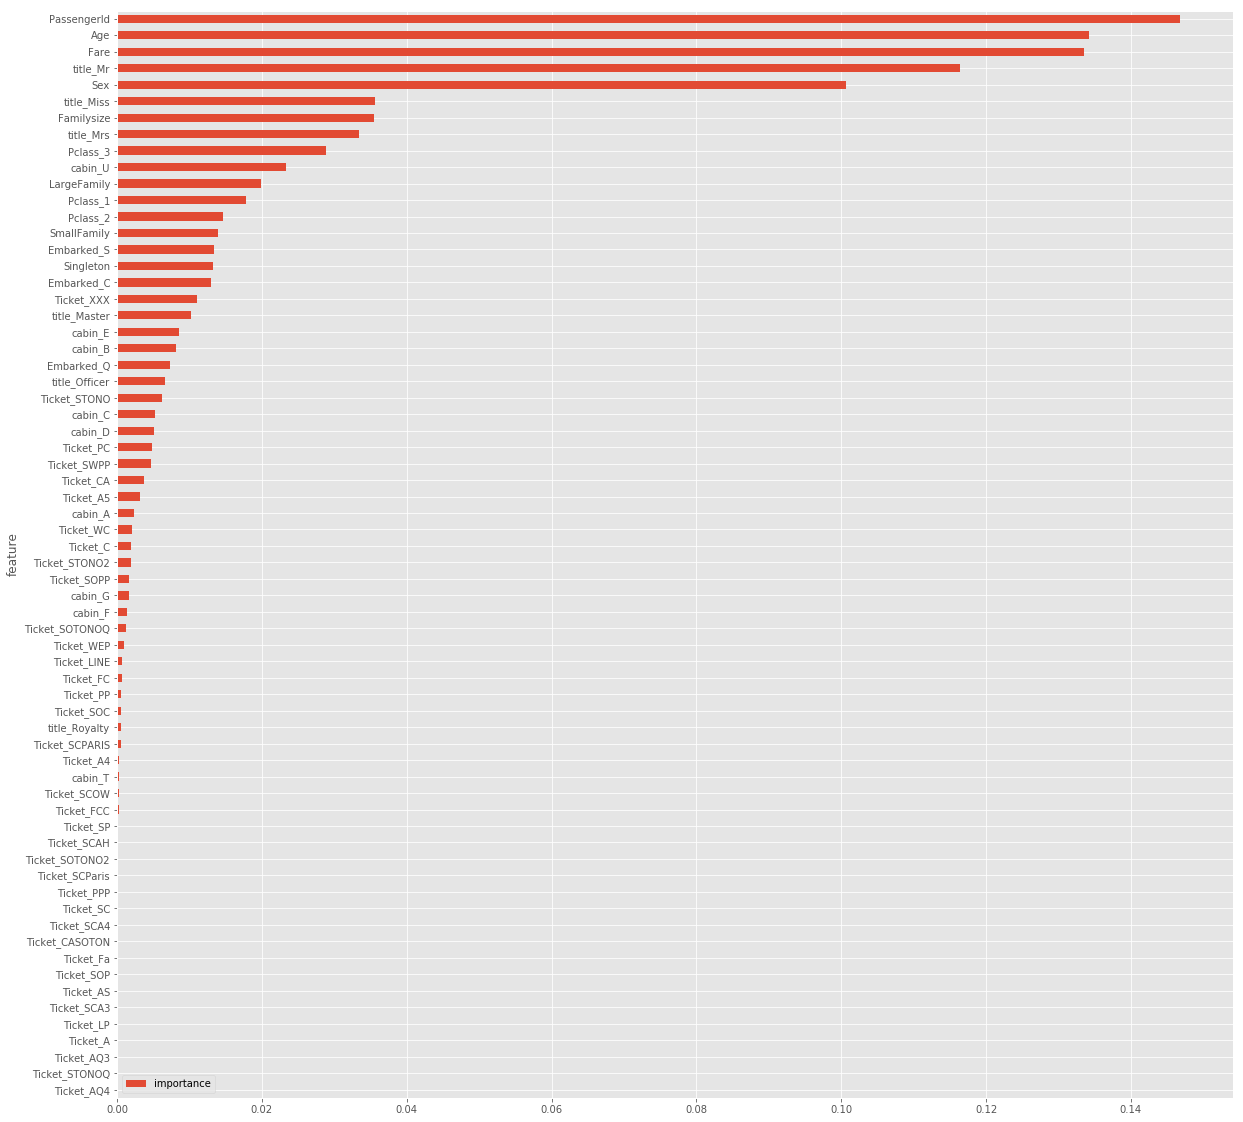

In [212]:
features.plot(kind='barh',figsize=(20,20))

In [213]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(891, 12)

In [214]:
test_reduced = model.transform(test)
test_reduced.shape

(418, 12)

In [215]:
parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
              'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}

model = RandomForestClassifier(**parameters)
model.fit(train, targets)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [216]:
train.shape

(891, 66)

In [217]:
compute_score(model,train,targets,scoring='accuracy')

0.82043608258354261

In [224]:
output = model.predict(test).astype(int)
output

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [229]:
df_output=pd.DataFrame()
aux=pd.read_csv(r'C:\Users\naveen chauhan\Desktop\mldata\titanic dataset\test.csv')
df_output['PassengerId']=aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv(r'C:\Users\naveen chauhan\Desktop\mldata\titanic dataset\output1.csv',index=False)